In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)
%matplotlib inline

In [2]:
pd.options.display.max_rows

2000

### Country data

In [3]:
country = pd.read_csv('../../Documents/WorldDevelopment/Country.csv')

In [4]:
country.columns

Index(['CountryCode', 'ShortName', 'TableName', 'LongName', 'Alpha2Code',
       'CurrencyUnit', 'SpecialNotes', 'Region', 'IncomeGroup', 'Wb2Code',
       'NationalAccountsBaseYear', 'NationalAccountsReferenceYear',
       'SnaPriceValuation', 'LendingCategory', 'OtherGroups',
       'SystemOfNationalAccounts', 'AlternativeConversionFactor',
       'PppSurveyYear', 'BalanceOfPaymentsManualInUse',
       'ExternalDebtReportingStatus', 'SystemOfTrade',
       'GovernmentAccountingConcept', 'ImfDataDisseminationStandard',
       'LatestPopulationCensus', 'LatestHouseholdSurvey',
       'SourceOfMostRecentIncomeAndExpenditureData',
       'VitalRegistrationComplete', 'LatestAgriculturalCensus',
       'LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData'],
      dtype='object')

In [5]:
country.shape

(247, 31)

In [6]:
country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,1980,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1968 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,2011 (household consumption only).,NaN,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


### Indicators data

In [7]:
indicators = pd.read_csv('../../Documents/WorldDevelopment/Indicators.csv')

In [8]:
indicators.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [9]:
indicators.shape

(5656458, 6)

In [10]:
indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [11]:
indicators.nunique()

CountryName          247
CountryCode          247
IndicatorName       1344
IndicatorCode       1344
Year                  56
Value            3601480
dtype: int64

In [12]:
pd.Series(indicators.CountryName.unique()).head()

0                                 Arab World
1                     Caribbean small states
2             Central Europe and the Baltics
3    East Asia & Pacific (all income levels)
4      East Asia & Pacific (developing only)
dtype: object

In [13]:
pd.Series(indicators.IndicatorName.unique()).head()

0    Adolescent fertility rate (births per 1,000 wo...
1    Age dependency ratio (% of working-age populat...
2    Age dependency ratio, old (% of working-age po...
3    Age dependency ratio, young (% of working-age ...
4          Arms exports (SIPRI trend indicator values)
dtype: object

In [14]:
indicators.IndicatorName[indicators.IndicatorName.str.contains('male')].unique()

array(['Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Mortality rate, adult, female (per 1,000 female adults)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Population, female (% of total)',
       'Survival to age 65, female (% of cohort)',
       'Survival to age 65, male (% of cohort)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, male (%)',
       'Gross enrolment ratio, pre-primary, female (%)',
       'Gross enrolment ratio, pre-primary, male (%)',
       'Gross enrolment ratio, primary, female (%)',
       'Gross enrolment ratio, primary, male (%)',
       'Gross enrolment ratio, secondary, female (%)',
       'Gross enrolment ratio, secondary, male (%)',
       'Gross enrolment ratio, tertiary, female (%)',
       'Gross enrolment ratio, tertiary, male (%)',
       'Net enrolment rate, primary, female (%)',
       'Net enrolment rate, primar

### Series data

In [15]:
series = pd.read_csv('../../Documents/WorldDevelopment/Series.csv')

In [16]:
series.columns

Index(['SeriesCode', 'Topic', 'IndicatorName', 'ShortDefinition',
       'LongDefinition', 'UnitOfMeasure', 'Periodicity', 'BasePeriod',
       'OtherNotes', 'AggregationMethod', 'LimitationsAndExceptions',
       'NotesFromOriginalSource', 'GeneralComments', 'Source',
       'StatisticalConceptAndMethodology', 'DevelopmentRelevance',
       'RelatedSourceLinks', 'OtherWebLinks', 'RelatedIndicators',
       'LicenseType'],
      dtype='object')

In [17]:
series.shape

(1345, 20)

In [18]:
pd.Series(series.IndicatorName.unique()).head()

0    Foreign direct investment, net (BoP, current US$)
1    Foreign direct investment, net inflows (% of GDP)
2    Foreign direct investment, net inflows (BoP, c...
3    Foreign direct investment, net outflows (% of ...
4               Net capital account (BoP, current US$)
dtype: object

In [19]:
series.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",NaN,Foreign direct investment refers to direct inv...,NaN,Annual,NaN,NaN,Sum,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",NaN,NaN,NaN,NaN,NaN,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",NaN,Net capital account records acquisitions and d...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open


### Data analysis

In [20]:
macro_region_list = ['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 
                     'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)', 
                     'Euro area', 'Europe & Central Asia (all income levels)', 
                     'Europe & Central Asia (developing only)', 'European Union', 
                     'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 
                     'High income', 'High income: nonOECD', 'High income: OECD', 
                     'Latin America & Caribbean (all income levels)', 'Latin America & Caribbean (developing only)', 
                     'Least developed countries: UN classification', 'Low & middle income', 'Low income', 
                     'Lower middle income', 'Middle East & North Africa (all income levels)', 
                     'Middle East & North Africa (developing only)', 'Middle income', 'North America', 
                     'OECD members', 'Other small states', 'Pacific island small states', 'Small states', 
                     'South Asia', 'Sub-Saharan Africa (all income levels)', 'Sub-Saharan Africa (developing only)', 
                     'Upper middle income', 'World']

In [21]:
df_country = indicators[~indicators["CountryName"].isin(macro_region_list)]

In [22]:
df_country[(df_country['CountryName'] == 'Sweden') & (df_country['IndicatorCode'] == 'IC.FRM.FEMM.ZS')]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5628892,Sweden,SWE,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,2014,12.5


In [23]:
df_firms_with_female_managers = df_country[df_country.IndicatorName.str.contains('Firms with female top manager')]

In [24]:
df_firms_with_female_managers.nunique()

CountryName      122
CountryCode      122
IndicatorName      1
IndicatorCode      1
Year               9
Value            124
dtype: int64

In [25]:
df_firms_with_female_managers_sorted = df_firms_with_female_managers.sort_values('Value', ascending=False)

In [26]:
df_firms_with_female_managers_sorted.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5000132,St. Vincent and the Grenadines,VCT,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,2010,38.6
4778044,Mongolia,MNG,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,2009,36.4
5480434,Mongolia,MNG,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,2013,35.6
4871600,"Bahamas, The",BHS,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,2010,33.2
5407104,Belarus,BLR,Firms with female top manager (% of firms),IC.FRM.FEMM.ZS,2013,32.7


[<matplotlib.text.Text at 0x105dc8b00>, <matplotlib.text.Text at 0x11a5d7d68>]

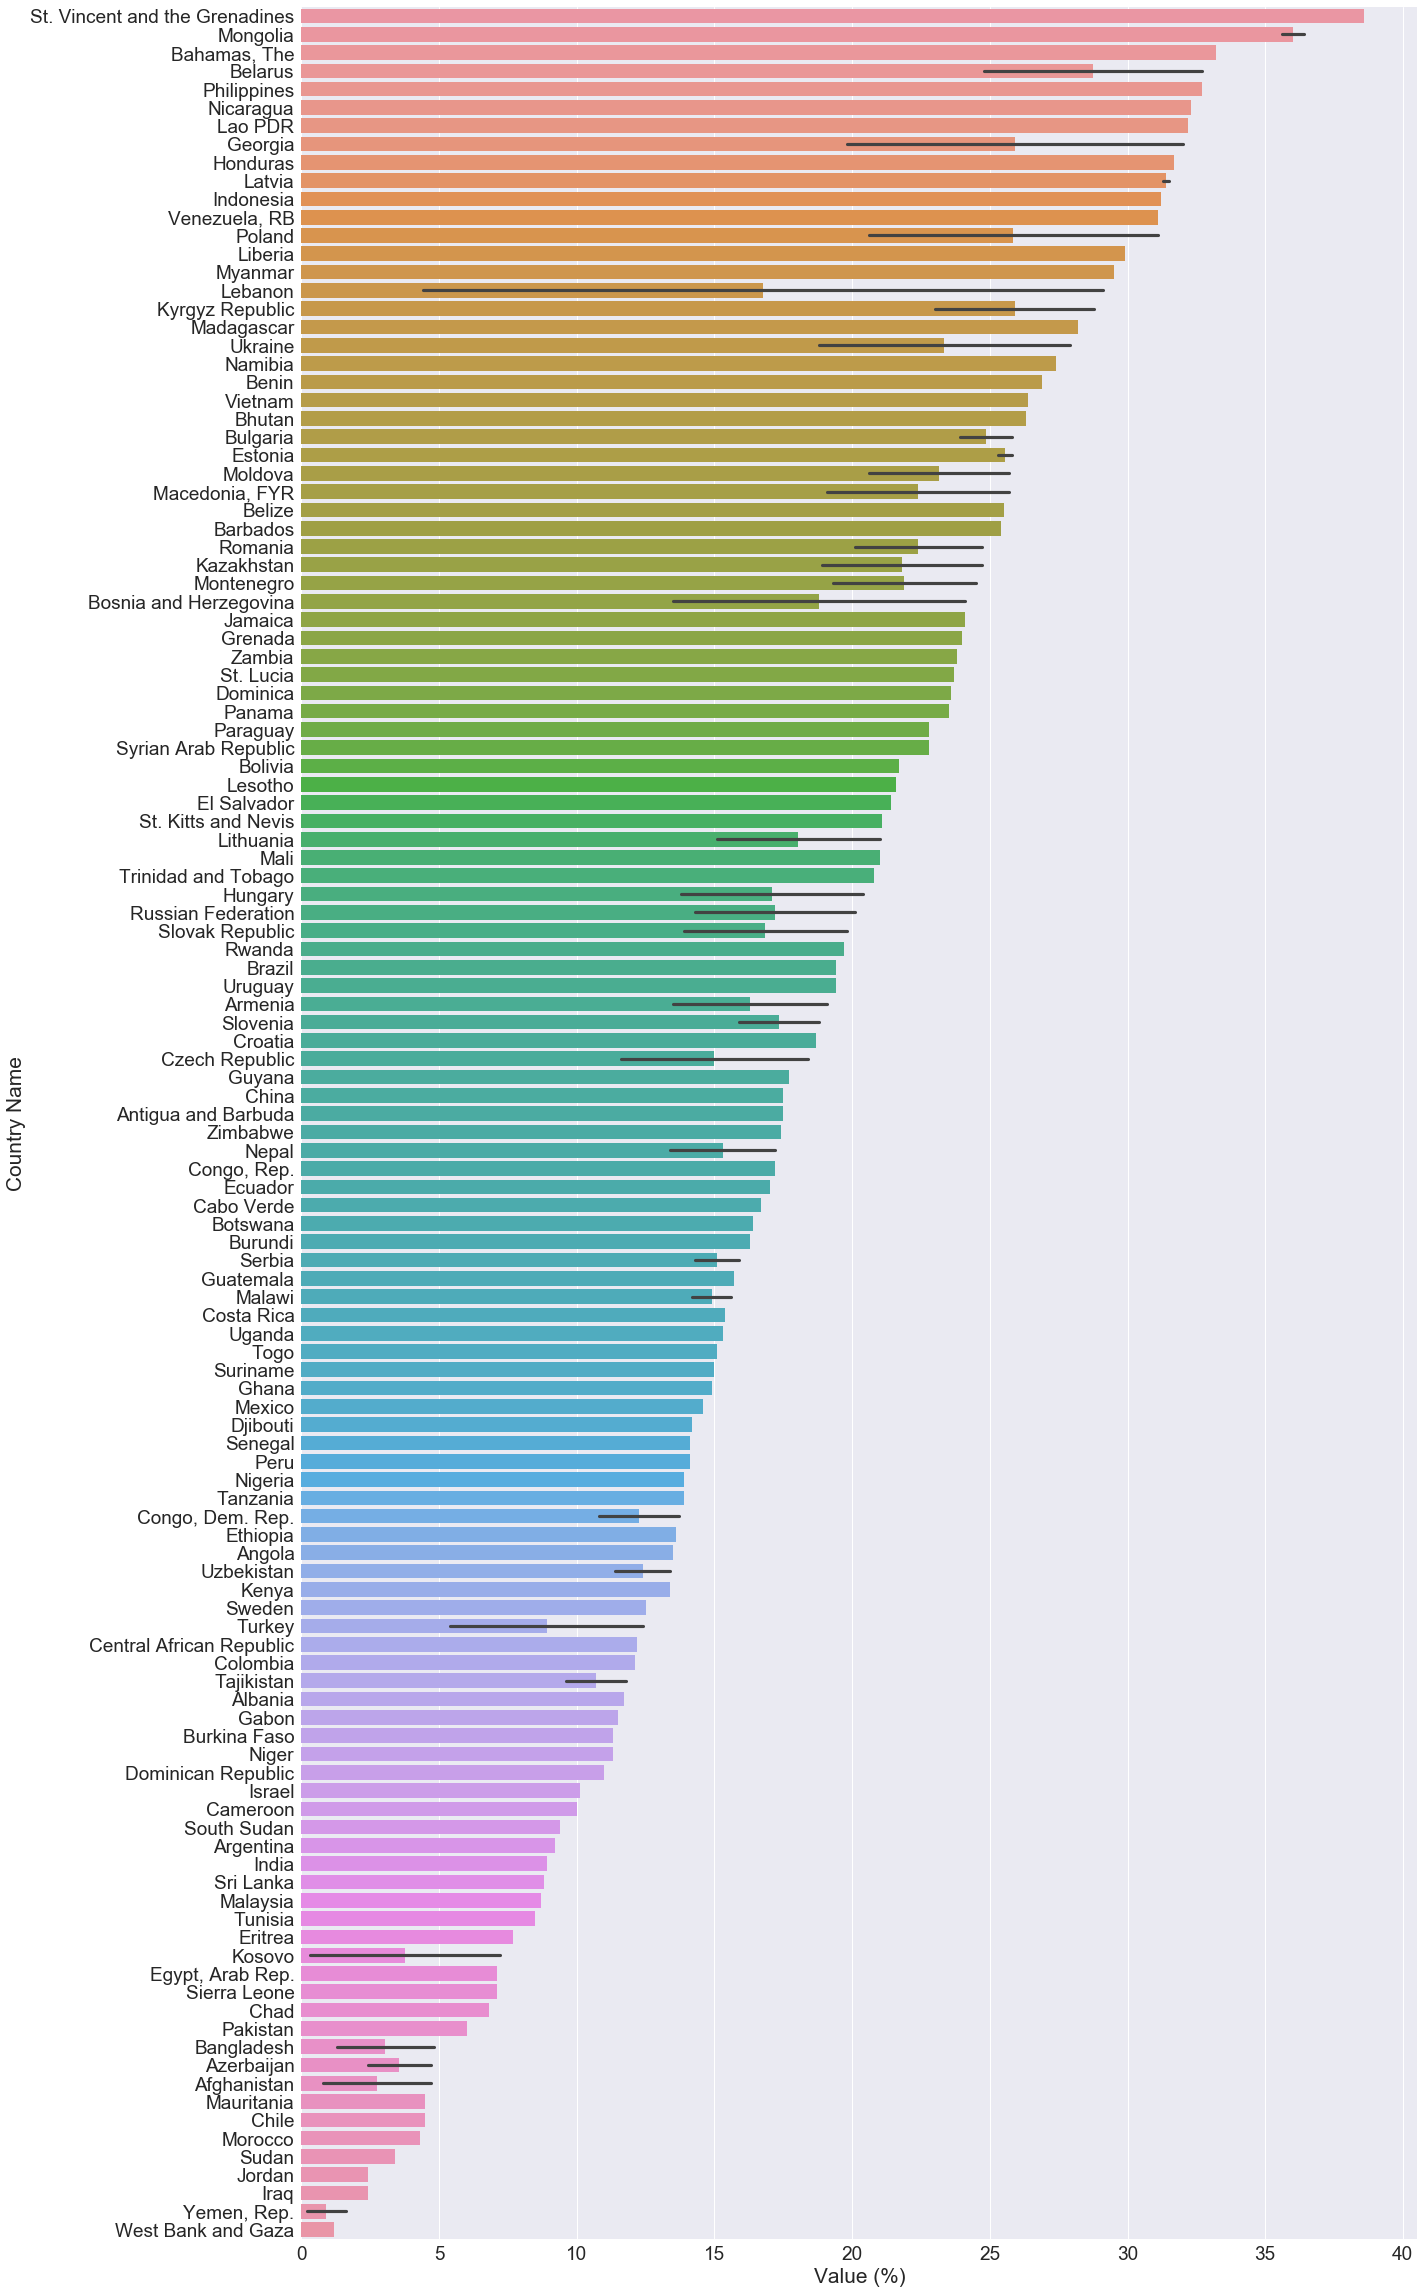

In [27]:
plt.figure(figsize=(20, 40))
sns.set(font_scale=1.9)
ax = sns.barplot(data=df_firms_with_female_managers_sorted, x='Value', y='CountryName')
ax.set(xlabel='Value (%)', ylabel='Country Name')

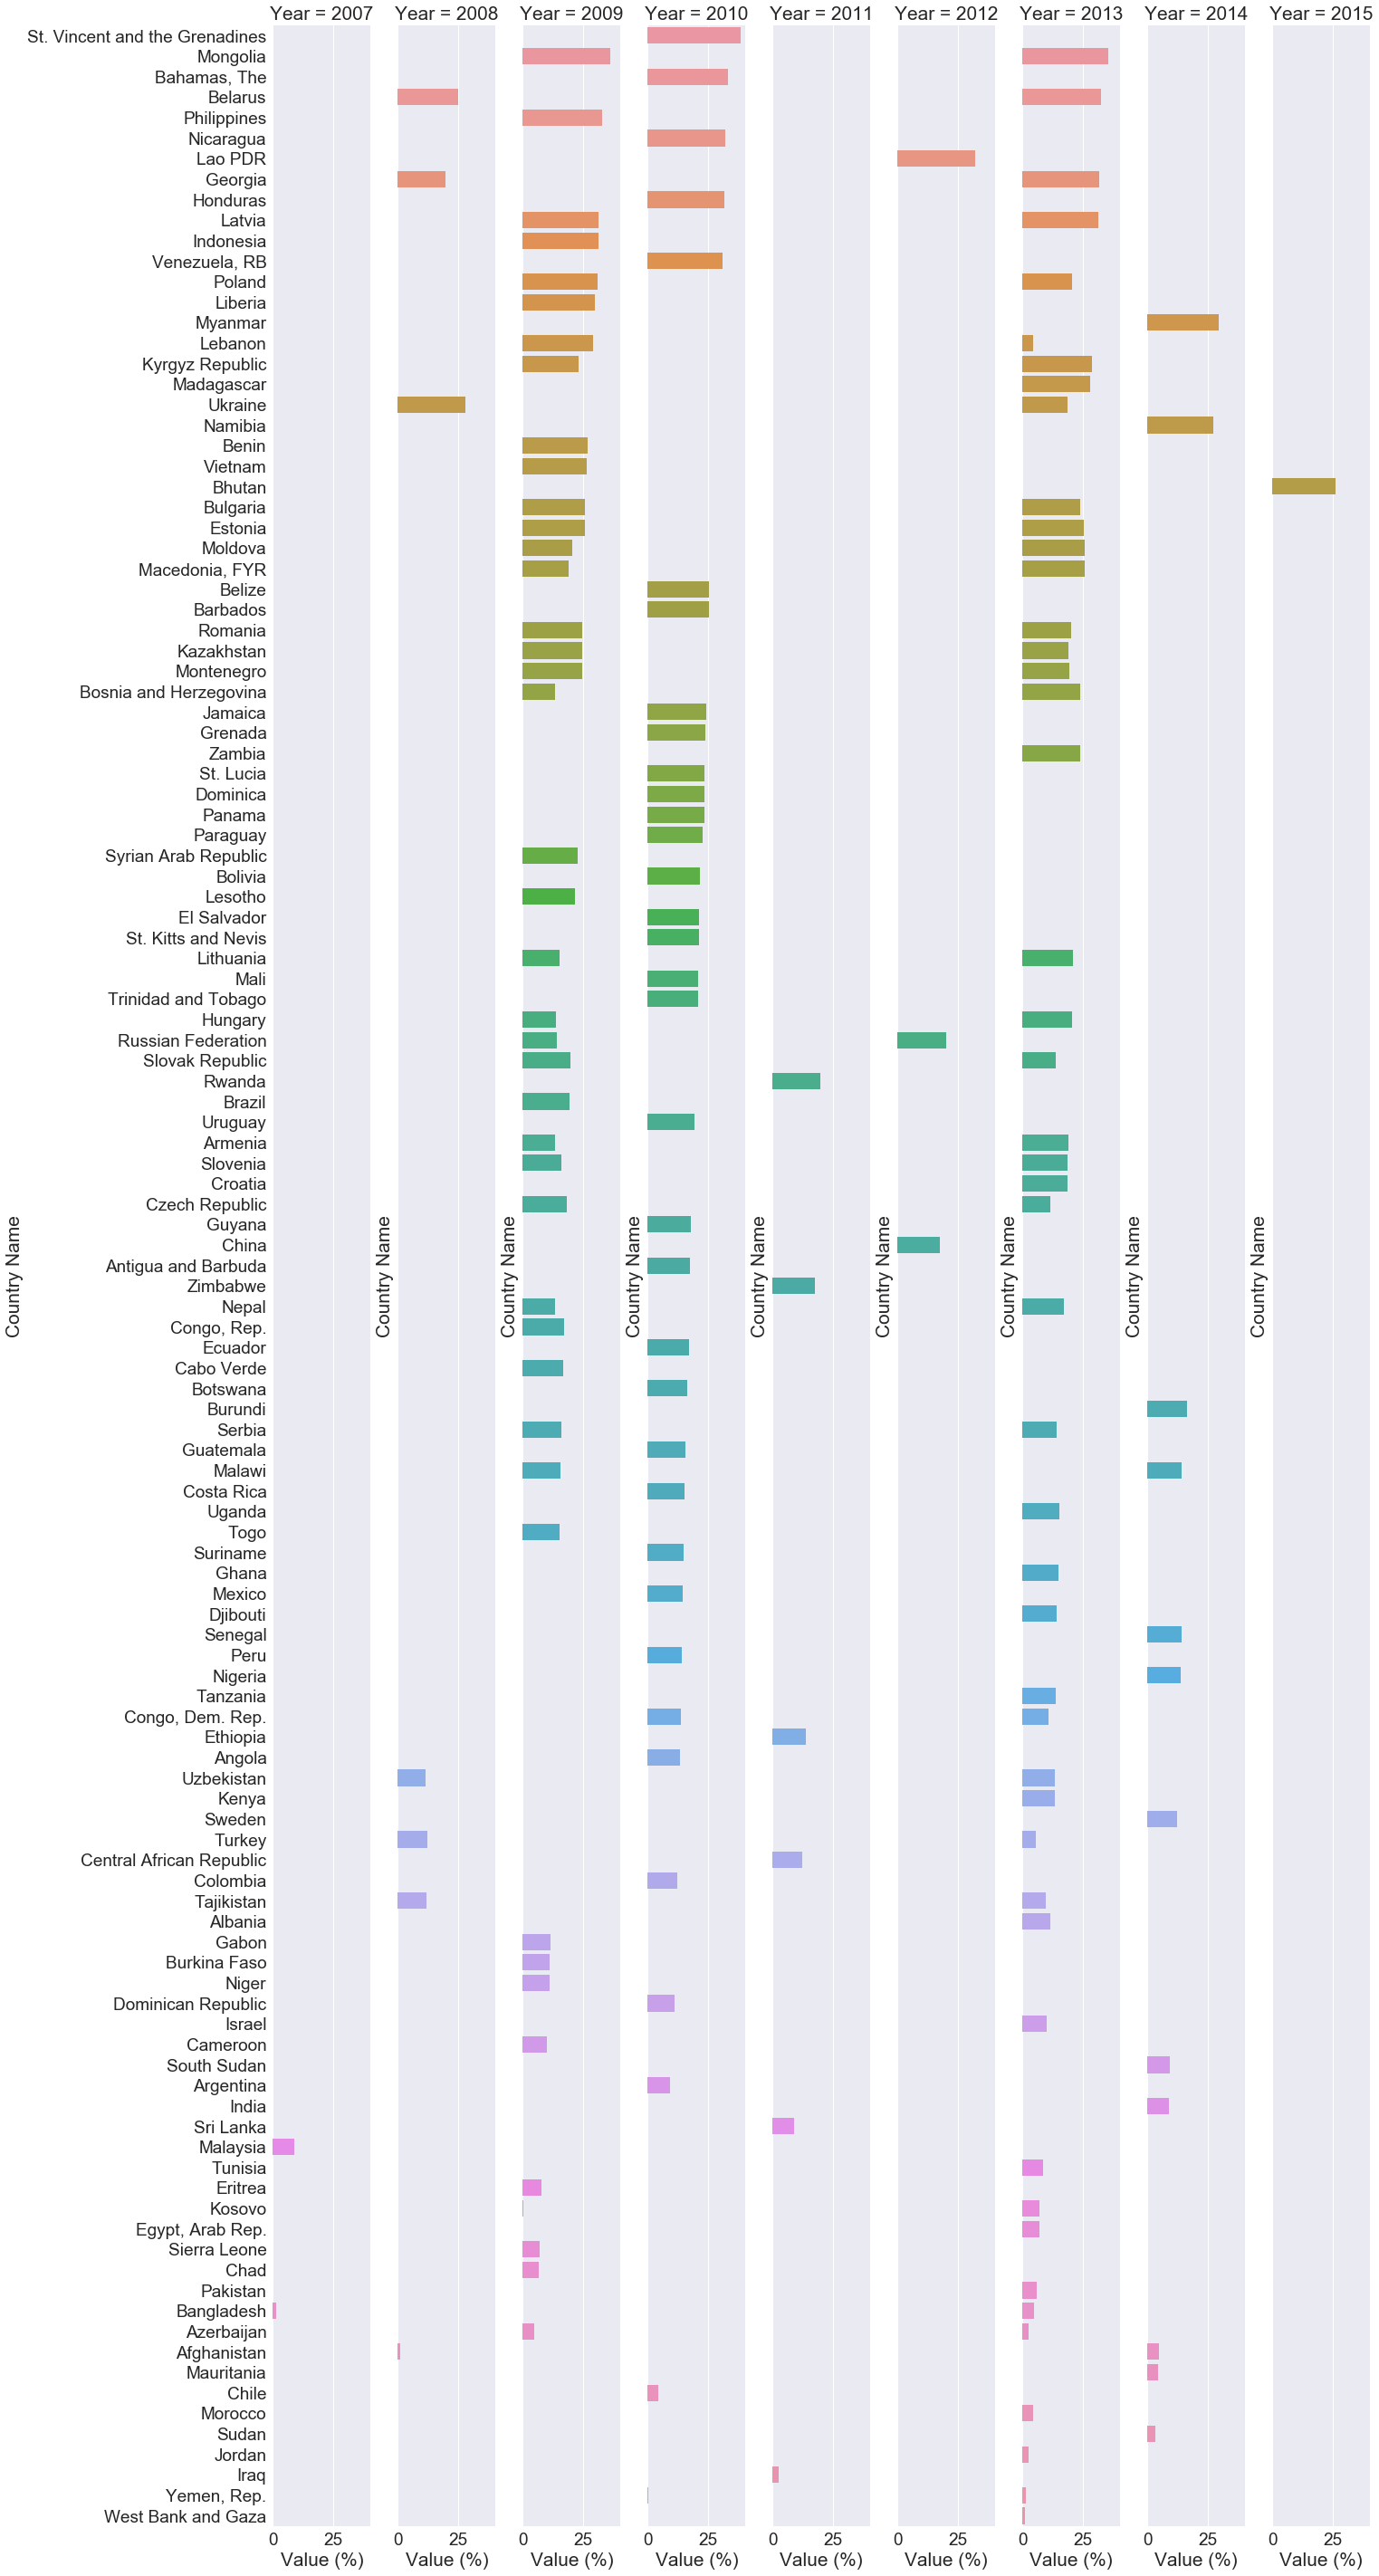

In [28]:
plt.figure(figsize=(20, 40))
sns.set(font_scale=1.9)
ax = sns.factorplot(data=df_firms_with_female_managers_sorted, x='Value', y='CountryName', col='Year', kind='bar', 
                    size=40, aspect=0.06)
ax.set(xlabel='Value (%)', ylabel='Country Name')

In [29]:
df_listed_companies = df_country[df_country.IndicatorName.str.contains('Listed domestic companies, total')]

In [30]:
df_firms_with_female_managers_sorted.Year.unique()

array([2010, 2009, 2013, 2012, 2014, 2008, 2015, 2011, 2007])

In [31]:
df_firms_with_female_managers_sorted.groupby('Year').nunique()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
Year,,,,,,
2007,2,2,1,1,1,2
2008,7,7,1,1,1,7
2009,43,43,1,1,1,37
2010,35,35,1,1,1,35
2011,6,6,1,1,1,6
2012,3,3,1,1,1,3
2013,48,48,1,1,1,43
2014,12,12,1,1,1,12
2015,1,1,1,1,1,1


In [32]:
len(df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2008)])

7

In [33]:
len(df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2009)])

43

In [34]:
len(df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2010)])

35

In [35]:
len(df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2011)])

6

In [36]:
len(df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2012)])

3

In [37]:
len(df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2013)])

48

In [38]:
len(df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2014)])

12

In [39]:
len(df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2015)])

1

In [40]:
df_firms_with_female_managers_sorted_2009 = df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2009)]

In [41]:
df_firms_with_female_managers_sorted_2013 = df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2013)]

In [42]:
df_firms_with_female_managers_sorted_2009_2013 = df_firms_with_female_managers_sorted[(df_firms_with_female_managers_sorted.Year == 2009) | (df_firms_with_female_managers_sorted.Year == 2013)]

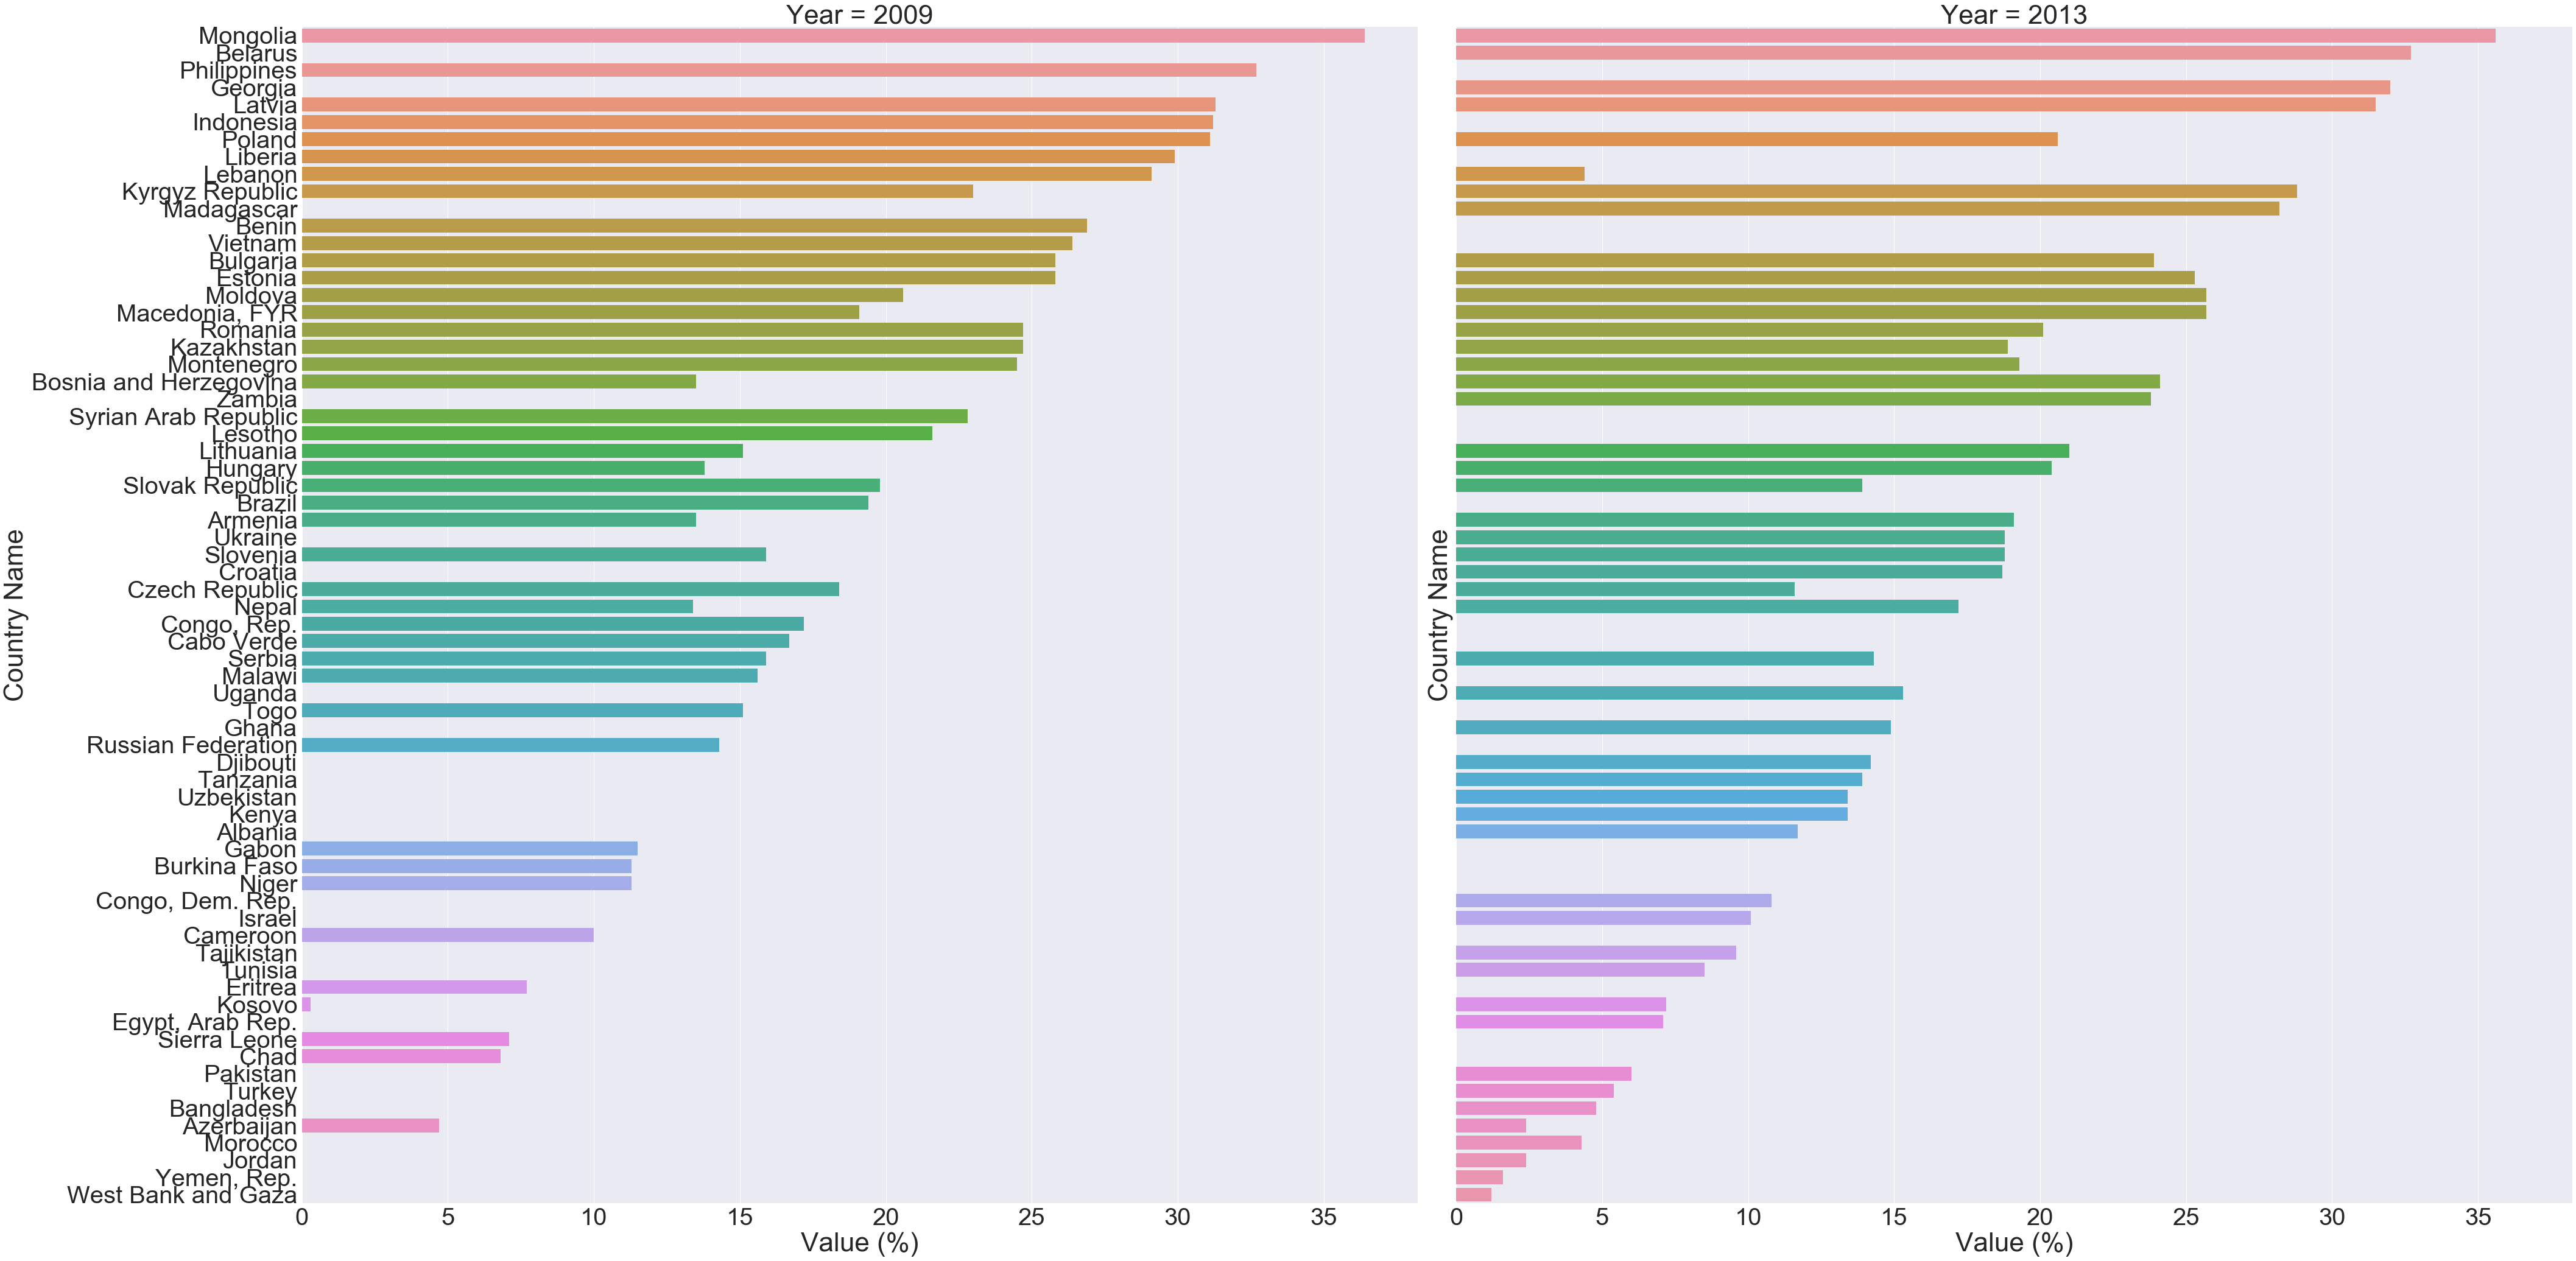

In [43]:
# plt.figure(figsize=(50, 80))
sns.set(font_scale=4)
ax = sns.factorplot(data=df_firms_with_female_managers_sorted_2009_2013, x='Value', y='CountryName', 
                    kind = 'bar', col='Year', size=30)
ax.set(xlabel='Value (%)', ylabel='Country Name')

In [44]:
df_pivot = df_firms_with_female_managers_sorted_2009_2013.pivot_table(values='Value', columns='Year', 
                                                                          index='CountryName')

In [45]:
df_listed_companies_by_year = df_listed_companies.pivot_table(values='Value', index='CountryName', columns='Year')

In [46]:
df_pivot.shape

(68, 2)

In [47]:
df_pivot.dropna(inplace=True)

In [48]:
df_pivot.shape

(23, 2)

In [49]:
df_pivot.head()

Year,2009,2013
CountryName,,
Armenia,13.5,19.1
Azerbaijan,4.7,2.4
Bosnia and Herzegovina,13.5,24.1
Bulgaria,25.8,23.9
Czech Republic,18.4,11.6


In [50]:
df_pivot['diff'] = df_pivot[2013] - df_pivot[2009]

In [51]:
df_pivot.reset_index(inplace=True)

In [52]:
df_pivot.head()

Year,CountryName,2009,2013,diff
0,Armenia,13.5,19.1,5.6
1,Azerbaijan,4.7,2.4,-2.3
2,Bosnia and Herzegovina,13.5,24.1,10.6
3,Bulgaria,25.8,23.9,-1.9
4,Czech Republic,18.4,11.6,-6.8


### Percentage change in number of female top manages from 2009 to 2013

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

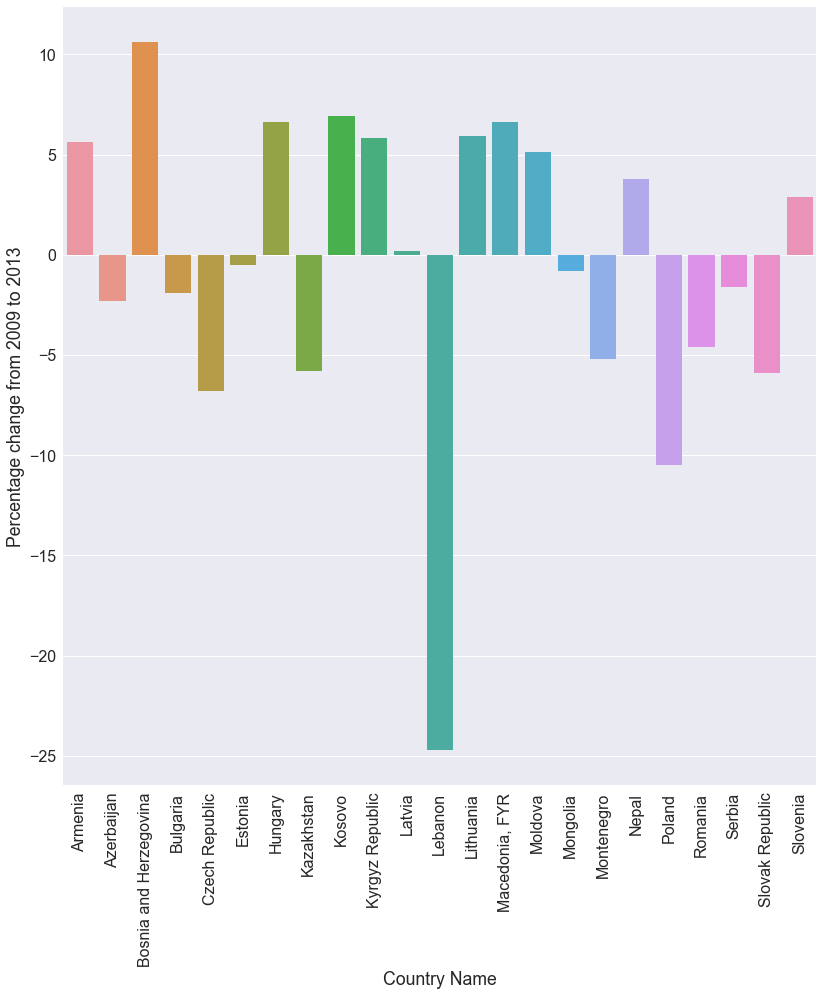

In [53]:
sns.set(font_scale=1.6)
ax = sns.factorplot(data=df_pivot, x='CountryName', y='diff', kind='bar', size=12)
ax.set(xlabel='Country Name', ylabel='Percentage change from 2009 to 2013')
plt.xticks(rotation=90)